In [27]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearch import HybridCombinationSearch
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender

In [3]:
seed = 1205
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.9, seed=seed)

In [4]:
print("Rp3beta training...")
rp3b = RP3betaRecommender(URM_train, verbose=False)
rp3b_params = {'topK': 1000, 'alpha': 0.38192761611274967, 'beta': 0.0, 'normalize_similarity': False}
rp3b.fit(**rp3b_params)
print("Done")
print("P3alpha training...")
p3a = P3alphaRecommender(URM_train, verbose=False)
p3a_params = {'topK': 131, 'alpha': 0.33660811631883863, 'normalize_similarity': False}
p3a.fit(**p3a_params)
print("Done")
print("ItemKnnCF training...")
icf = ItemKNNCFRecommender(URM_train, verbose=False)
icf_params = {'topK': 100, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.0}
icf.fit(**icf_params)
print("Done")
print("UserKnnCF training...")
ucf = UserKNNCFRecommender(URM_train, verbose=False)
ucf_params = {'topK': 190, 'shrink': 0, 'similarity': 'cosine', 'normalize': True}
ucf.fit(**ucf_params)
print("Done")
print("ItemKnnCBF training...")
icb = ItemKNNCBFRecommender(URM_train, ICM_all, verbose=False)
icb_params = {'topK': 205, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'BM25'}
icb.fit(**icb_params)
print("Done")

Rp3beta training...
Done
P3alpha training...
Done
ItemKnnCF training...
Similarity column 25975 ( 100 % ), 4103.87 column/sec, elapsed time 0.11 min
Done
UserKnnCF training...
Similarity column 7947 ( 100 % ), 11484.11 column/sec, elapsed time 0.01 min
Done
ItemKnnCBF training...
Similarity column 25975 ( 100 % ), 3081.85 column/sec, elapsed time 0.14 min
Done


In [5]:
print("SlimBPR training...")
sbpr = SLIM_BPR_Cython(URM_train, verbose=False)
sbpr_params = {'topK': 979, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 0.004947329669424629, 'lambda_j': 1.1534760845071758e-05, 'learning_rate': 0.0001}
sbpr.fit(**sbpr_params)
print("Done")
print("SlimElasticNet training...")
sen = SLIMElasticNetRecommender(URM_train, verbose=False)
sen_params = {'topK': 992, 'l1_ratio': 0.004065081925341167, 'alpha': 0.003725005053334143}
sen.fit(**sen_params)

SlimBPR training...
Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Epoch 1 of 130. Elapsed time 0.15 sec
SLIM_BPR_Recommender: Epoch 2 of 130. Elapsed time 0.28 sec
SLIM_BPR_Recommender: Epoch 3 of 130. Elapsed time 0.39 sec
SLIM_BPR_Recommender: Epoch 4 of 130. Elapsed time 0.48 sec
SLIM_BPR_Recommender: Epoch 5 of 130. Elapsed time 0.57 sec
SLIM_BPR_Recommender: Epoch 6 of 130. Elapsed time 0.65 sec
SLIM_BPR_Recommender: Epoch 7 of 130. Elapsed time 0.72 sec
SLIM_BPR_Recommender: Epoch 8 of 130. Elapsed time 0.79 sec
SLIM_BPR_Recommender: Epoch 9 of 130. Elapsed time 0.85 sec
SLIM_BPR_Recommender: Epoch 10 of 130. Elapsed time 0.91 sec
SLIM_BPR_Recommender: Epoch 11 of 130. Elapsed time 0.96 sec
SLIM_BPR_Recommender: Epoch 12 of 130. Elapsed time 1.01 sec
SLIM_BPR_Recommender: Epoch 13 of 130. Elapsed time 1.05 sec
SLIM_BPR_Recommender: Epoch 14 of 130. Elapsed time 1.09 sec
SLIM_BPR_Recommender: Epoch 15 of 130. Elapsed time 1.13 sec
SLIM_BPR_Recommender

---
### combo training

In [47]:
labels ={
    'combo1': 'icf_ucf_icb',
    'combo2': 'p3a_icf_icb',
    'combo3': 'p3a_ucf_icb',
    'combo4': 'rp3b_icf_icb',
    'combo5': 'rp3b_p3a_icb',
    'combo6': 'icf_icb_sen',
    'combo7': 'rp3b_ucf_icb',
    'combo8': 'p3a_icb_sbpr',
    'combo9': 'rp3b_icb_sbpr',
    'combo10': 'p3a_icb_sen',
    'combo11': 'p3a_icf_ucf',
    'combo12': 'icb_sen_sbpr',
    'combo13': 'ucf_icb_sbpr',
    'combo14': 'ucf_icb_sen',
    'combo15': 'rp3b_icb_sen',
    'combo16': 'rp3b_p3a_icf',
    'combo17': 'rp3b_p3a_ucf',
    'combo18': 'rp3b_icf_ucf'
}

In [48]:
list_recommender = [rp3b, icf, ucf]
combo18 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5630173292967398, 'l1_ratio': 0.92733589638295}
combo18.fit(**params)
result = evaluator(combo18, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06442878427055904,
 'Precision': 0.027618119824646525,
 'Recall': 0.13577780241876639}

In [49]:
list_recommender = [rp3b, p3a, ucf]
combo17 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6405838432360388, 'l1_ratio': 0.4188312253799342}
combo17.fit(**params)
result = evaluator(combo17, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06480067672691545,
 'Precision': 0.027812956648806286,
 'Recall': 0.13474876173470257}

In [50]:
list_recommender = [rp3b, p3a, icf]
combo16 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.367698407319822, 'l1_ratio': 0.5878133798647788}
combo16.fit(**params)
result = evaluator(combo16, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06492389892219981,
 'Precision': 0.0276424744276665,
 'Recall': 0.13411473851981948}

In [8]:
list_recommender = [rp3b, icb, sen]
combo15 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9986952651067782, 'l1_ratio': 0.40273040559834994}
combo15.fit(**params)
result = evaluator(combo15, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07556341507711299,
 'Precision': 0.03317096931319966,
 'Recall': 0.1651379860650265}

In [9]:
list_recommender = [ucf, icb, sen]
combo14 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4960538848298478, 'l1_ratio': 0.3805091314133038}
combo14.fit(**params)
result = evaluator(combo14, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07451505127812867,
 'Precision': 0.03287871407696006,
 'Recall': 0.16476457699440641}

In [10]:
list_recommender = [ucf, icb, sbpr]
combo13 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.36976685355295563, 'l1_ratio': 0.46692198040584476}
combo13.fit(**params)
result = evaluator(combo13, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.0746237100313596,
 'Precision': 0.032854359473940095,
 'Recall': 0.16175120530204842}

In [11]:
list_recommender = [icb, sen, sbpr]
combo12 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9651828293963296, 'l1_ratio': 0.14049121822460078}
combo12.fit(**params)
result = evaluator(combo12, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07258296158661173,
 'Precision': 0.032708231855820245,
 'Recall': 0.16140612123705755}

In [12]:
list_recommender = [icf, ucf, icb]
combo1 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.767469300493861, 'l1_ratio': 0.7325725081659069}
combo1.fit(**params)
result = evaluator(combo1, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07393030866529277,
 'Precision': 0.032075012177301056,
 'Recall': 0.1605452117674209}

In [13]:
list_recommender = [p3a, icf, icb]
combo2 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4066665999396494, 'l1_ratio': 0.7594645794234393}
combo2.fit(**params)
result = evaluator(combo2, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07376934208945422,
 'Precision': 0.03336580613735939,
 'Recall': 0.16575915962991022}

In [14]:
list_recommender = [p3a, ucf, icb]
combo3 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.37776131907747645, 'l1_ratio': 0.44018901104481}
combo3.fit(**params)
result = evaluator(combo3, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07558903956803789,
 'Precision': 0.033852898197758816,
 'Recall': 0.16811140689001017}

In [15]:
list_recommender = [rp3b, icf, icb]
combo4 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.40426999639005445, 'l1_ratio': 1.0}
combo4.fit(**params)
result = evaluator(combo4, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07561705104323477,
 'Precision': 0.03314661471017969,
 'Recall': 0.16507420019997424}

In [16]:
list_recommender = [rp3b, p3a, icb]
combo5 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3553383791480798, 'l1_ratio': 0.000435281815357902}
combo5.fit(**params)
result = evaluator(combo5, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07373023198112198,
 'Precision': 0.03312226010715969,
 'Recall': 0.1647746157147823}

In [17]:
list_recommender = [icf, icb, sen]
combo6 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7783657178315921, 'l1_ratio': 0.9570845000744118}
combo6.fit(**params)
result = evaluator(combo6, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07354161750031309,
 'Precision': 0.03285435947394007,
 'Recall': 0.16369573615886576}

In [18]:
list_recommender = [rp3b, ucf, icb]
combo7 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4648716125499346, 'l1_ratio': 0.292302921903516}
combo7.fit(**params)
result = evaluator(combo7, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07565350344554111,
 'Precision': 0.03324403312225959,
 'Recall': 0.16389913214611948}

In [19]:
list_recommender = [p3a, icb, sbpr]
combo8 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha':0.5521014101582482, 'l1_ratio': 0.33884991586467056}
combo8.fit(**params)
result = evaluator(combo8, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07443566069515592,
 'Precision': 0.03331709693131945,
 'Recall': 0.16596109488105854}

In [20]:
list_recommender = [rp3b, icb, sbpr]
combo9 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3592184105265153, 'l1_ratio': 0.2874563071761684}
combo9.fit(**params)
result = evaluator(combo9, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07504770739365002,
 'Precision': 0.03314661471017969,
 'Recall': 0.1633533304698168}

In [21]:
list_recommender = [p3a, icb, sen]
combo10 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.38257019222950617}
combo10.fit(**params)
result = evaluator(combo10, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.07319617496969014,
 'Precision': 0.03283000487092007,
 'Recall': 0.16300893054920593}

In [22]:
list_recommender = [p3a, icf, ucf]
combo11 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5630173292967398, 'l1_ratio': 0.92733589638295}
combo11.fit(**params)
result = evaluator(combo11, URM_test, cutoff=10)
result

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.


{'MAP': 0.06493166340926142,
 'Precision': 0.028007793472966037,
 'Recall': 0.1352904082270535}

### USER-WISE

```
    results = evaluator(combo1, URM_test_group,cutoff=10)
    MAP_combo1_per_group.append(results["MAP"])
 
    results = evaluator(combo2, URM_test_group,cutoff=10)
    MAP_combo2_per_group.append(results["MAP"])
 
    results = evaluator(combo3, URM_test_group,cutoff=10)
    MAP_combo3_per_group.append(results["MAP"])
 
    results = evaluator(combo4, URM_test_group,cutoff=10)
    MAP_combo4_per_group.append(results["MAP"])
 
    results = evaluator(combo5, URM_test_group,cutoff=10)
    MAP_combo5_per_group.append(results["MAP"])
 
    results = evaluator(combo6, URM_test_group,cutoff=10)
    MAP_combo6_per_group.append(results["MAP"])
    
    results = evaluator(combo7, URM_test_group,cutoff=10)
    MAP_combo7_per_group.append(results["MAP"])
    
    results = evaluator(combo8, URM_test_group,cutoff=10)
    MAP_combo8_per_group.append(results["MAP"])
    
    results = evaluator(combo9, URM_test_group,cutoff=10)
    MAP_combo9_per_group.append(results["MAP"])
```

In [51]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]
MAP_combo1_per_group = []
MAP_combo2_per_group = []
MAP_combo3_per_group = []
MAP_combo4_per_group = []
MAP_combo5_per_group = []
MAP_combo6_per_group = []
MAP_combo7_per_group = []
MAP_combo8_per_group = []
MAP_combo9_per_group = []
MAP_combo10_per_group = []
MAP_combo11_per_group = []
MAP_combo12_per_group = []
MAP_combo13_per_group = []
MAP_combo14_per_group = []
MAP_combo15_per_group = []
MAP_combo16_per_group = []
MAP_combo17_per_group = []
MAP_combo18_per_group = []

cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    results, _ = evaluator_test.evaluateRecommender(combo1)
    MAP_combo1_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo2)
    MAP_combo2_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo3)
    MAP_combo3_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo4)
    MAP_combo4_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo5)
    MAP_combo5_per_group.append(results[cutoff]["MAP"])
 
    results, _ = evaluator_test.evaluateRecommender(combo6)
    MAP_combo6_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo7)
    MAP_combo7_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo8)
    MAP_combo8_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo9)
    MAP_combo9_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo10)
    MAP_combo10_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo11)
    MAP_combo11_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo12)
    MAP_combo12_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo13)
    MAP_combo13_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo14)
    MAP_combo14_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo15)
    MAP_combo15_per_group.append(results[cutoff]["MAP"]) 
    
    results, _ = evaluator_test.evaluateRecommender(combo16)
    MAP_combo16_per_group.append(results[cutoff]["MAP"])
    
    results, _ = evaluator_test.evaluateRecommender(combo17)
    MAP_combo17_per_group.append(results[cutoff]["MAP"])  
    
    results, _ = evaluator_test.evaluateRecommender(combo18)
    MAP_combo18_per_group.append(results[cutoff]["MAP"]) 
    

EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.87 sec. Users per second: 648
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.79 sec. Users per second: 715
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.80 sec. Users per second: 708
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.80 sec. Users per second: 706
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.84 sec. Users per second: 678
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.86 sec. Users per second: 662
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.88 sec. Users per second: 647
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.85 sec. Users per second: 667
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.85 sec. Users per second: 663
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.82 sec. Users per second: 693
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.81 sec. Users per second: 701
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.81 sec. Users per second: 695
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.84 

EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.16 sec. Users per second: 449
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.28 sec. Users per second: 409
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.41 sec. Users per second: 371
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.14 sec. Users per second: 459
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.97 sec. Users per second: 538
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.37 sec. Users per second: 382
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.31 sec. Users per second: 398
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.17 sec. Users per second: 445
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.27 sec. Users per second: 411
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.13 sec. Users per second: 462
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.09 sec. Users per second: 478
EvaluatorHoldout: Processed 522 ( 100.00% ) in 1.13 sec. Users per second: 461
EvaluatorHoldout: Processed 80 ( 100.00% ) in 0.23 s

In [52]:
MAP_combo_list = [MAP_combo1_per_group,
MAP_combo2_per_group,
MAP_combo3_per_group,
MAP_combo4_per_group,
MAP_combo5_per_group,
MAP_combo6_per_group,
MAP_combo7_per_group,
MAP_combo8_per_group,
MAP_combo9_per_group,
MAP_combo10_per_group,
MAP_combo11_per_group,
MAP_combo12_per_group,
MAP_combo13_per_group,
MAP_combo14_per_group,
MAP_combo15_per_group,
MAP_combo16_per_group,
MAP_combo17_per_group,
MAP_combo18_per_group]

In [53]:
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    maxc = ''
    combo_difference = ''
    max_difference = 0
    for n, MAP_combo in enumerate(MAP_combo_list):
        combo_name = 'combo' + str(n+1)
        print(f"> MAP {labels[combo_name]}:\t {MAP_combo[i]}")
        if MAP_combo[i] > maxp:
            max_difference = MAP_combo[i] - maxp
            combo_difference = maxc
            maxp = MAP_combo[i]
            maxc = labels[combo_name]
    print(f"Max MAP is {maxp} from {maxc} with difference from previous max of {max_difference} from {combo_difference}\n")
        
    '''
    print(f"> MAP {labels['combo1']}:\t {MAP_combo1_per_group[i]}")
    print(f"> MAP {labels['combo2']}:\t {MAP_combo2_per_group[i]}")
    print(f"> MAP {labels['combo3']}:\t {MAP_combo3_per_group[i]}")
    print(f"> MAP {labels['combo4']}:\t {MAP_combo4_per_group[i]}")
    print(f"> MAP {labels['combo5']}:\t {MAP_combo5_per_group[i]}")
    print(f"> MAP {labels['combo6']}:\t {MAP_combo6_per_group[i]}")
    print(f"> MAP {labels['combo7']}:\t {MAP_combo7_per_group[i]}")
    print(f"> MAP {labels['combo8']}:\t {MAP_combo8_per_group[i]}")
    print(f"> MAP {labels['combo9']}:\t {MAP_combo9_per_group[i]}")
    print(f"> MAP {labels['combo10']}:\t {MAP_combo10_per_group[i]}")
    print(f"> MAP {labels['combo11']}:\t {MAP_combo11_per_group[i]}")
    print(f"> MAP {labels['combo12']}:\t {MAP_combo12_per_group[i]}")
    print(f"> MAP {labels['combo13']}:\t {MAP_combo13_per_group[i]}")
    print(f"> MAP {labels['combo14']}:\t {MAP_combo14_per_group[i]}")
    print(f"> MAP {labels['combo15']}:\t {MAP_combo15_per_group[i]}")
    '''

RANGE (0, 3)
> MAP icf_ucf_icb:	 0.07526490081702097
> MAP p3a_icf_icb:	 0.07667809467721132
> MAP p3a_ucf_icb:	 0.07721373885243148
> MAP rp3b_icf_icb:	 0.08174673285097318
> MAP rp3b_p3a_icb:	 0.07566780245667172
> MAP icf_icb_sen:	 0.0748109353674725
> MAP rp3b_ucf_icb:	 0.07681551124572328
> MAP p3a_icb_sbpr:	 0.07736868304447814
> MAP rp3b_icb_sbpr:	 0.07717307476583098
> MAP p3a_icb_sen:	 0.07538841213752877
> MAP p3a_icf_ucf:	 0.06631225811879525
> MAP icb_sen_sbpr:	 0.07238487856862418
> MAP ucf_icb_sbpr:	 0.07283452053770076
> MAP ucf_icb_sen:	 0.07650270159104083
> MAP rp3b_icb_sen:	 0.0812643726512985
> MAP rp3b_p3a_icf:	 0.06792515003645748
> MAP rp3b_p3a_ucf:	 0.06712834427057043
> MAP rp3b_icf_ucf:	 0.06857156879241685
Max MAP is 0.08174673285097318 from rp3b_icf_icb with difference from previous max of 0.004532993998541707 from p3a_ucf_icb

RANGE (3, 5)
> MAP icf_ucf_icb:	 0.09270329617790897
> MAP p3a_icf_icb:	 0.08285329526723677
> MAP p3a_ucf_icb:	 0.0904035643708622


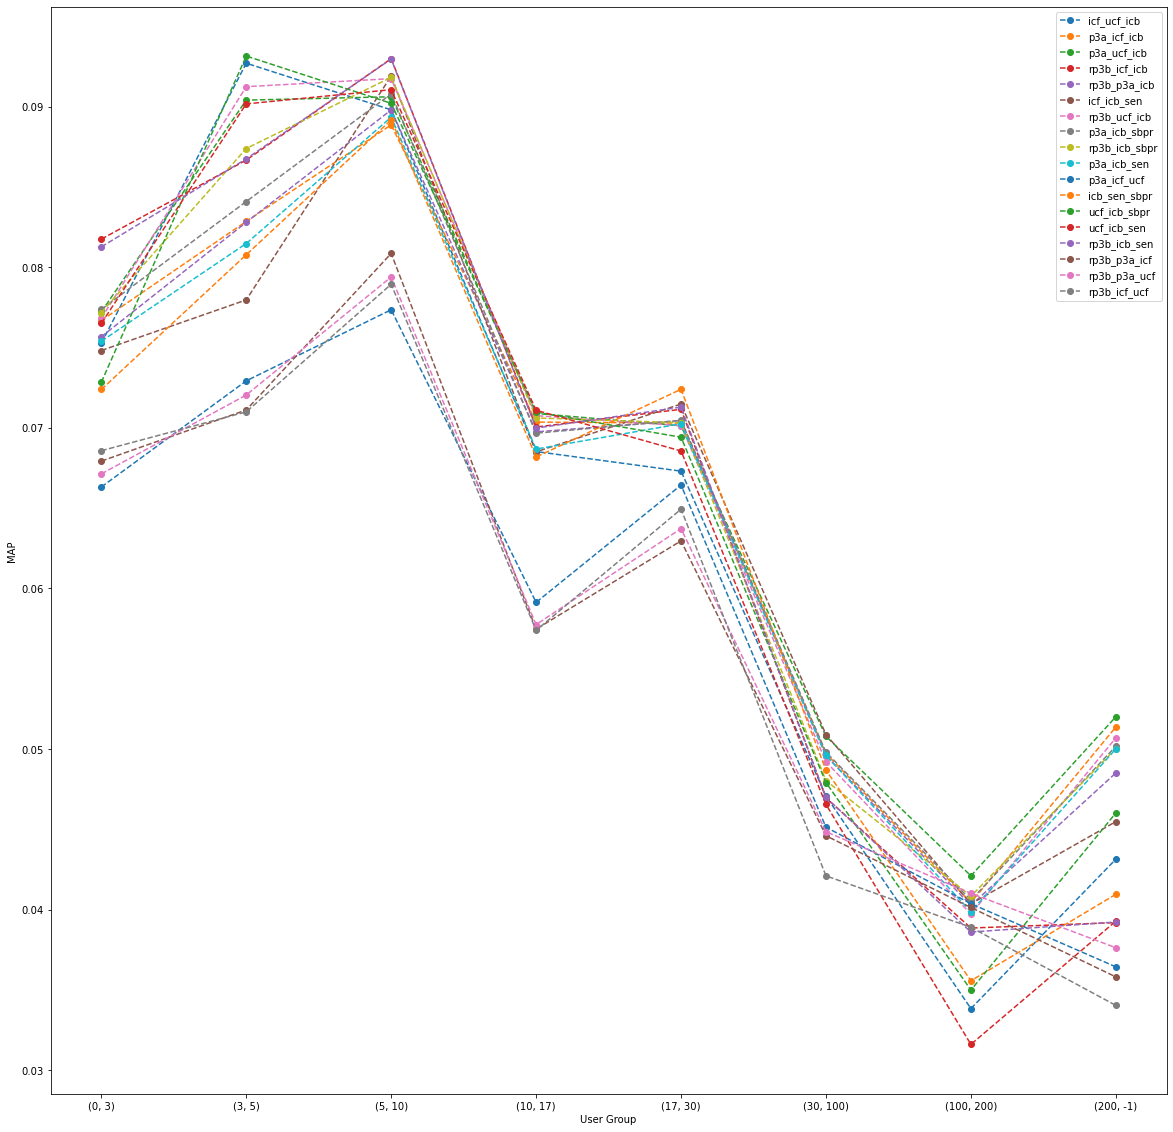

In [55]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
pyplot.plot(MAP_combo1_per_group, '--o', label=labels["combo1"])
pyplot.plot(MAP_combo2_per_group, '--o', label=labels["combo2"])
pyplot.plot(MAP_combo3_per_group, '--o', label=labels["combo3"])
pyplot.plot(MAP_combo4_per_group, '--o', label=labels["combo4"])
pyplot.plot(MAP_combo5_per_group, '--o', label=labels["combo5"])
pyplot.plot(MAP_combo6_per_group, '--o', label=labels["combo6"])
pyplot.plot(MAP_combo7_per_group, '--o', label=labels["combo7"])
pyplot.plot(MAP_combo8_per_group, '--o', label=labels["combo8"])
pyplot.plot(MAP_combo9_per_group, '--o', label=labels["combo9"])
pyplot.plot(MAP_combo10_per_group, '--o', label=labels["combo10"])
pyplot.plot(MAP_combo11_per_group, '--o', label=labels["combo11"])
pyplot.plot(MAP_combo12_per_group, '--o', label=labels["combo12"])
pyplot.plot(MAP_combo13_per_group, '--o', label=labels["combo13"])
pyplot.plot(MAP_combo14_per_group, '--o', label=labels["combo14"])
pyplot.plot(MAP_combo15_per_group, '--o', label=labels["combo15"])
pyplot.plot(MAP_combo16_per_group, '--o', label=labels["combo16"])
pyplot.plot(MAP_combo17_per_group, '--o', label=labels["combo17"])
pyplot.plot(MAP_combo18_per_group, '--o', label=labels["combo18"])
pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()